In [843]:
import numpy as np
from scipy import signal
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.io import ascii
%matplotlib inline

plt.style.use('classic')

In [2]:
# Data import

data4 = ascii.read("4.txt")
data6 = ascii.read("6.txt")
data8 = ascii.read("8.txt")
data10 = ascii.read("10.txt")
data12 = ascii.read("12.txt")
data14 = ascii.read("14.txt")
data16 = ascii.read("16.txt")
data18 = ascii.read("18.txt")
data20 = ascii.read("20.txt")
data22 = ascii.read("22.txt")
data24 = ascii.read("24.txt")
data26 = ascii.read("26.txt")
data28 = ascii.read("28.txt")
data30 = ascii.read("30.txt")
data32 = ascii.read("32.txt")
data34 = ascii.read("34.txt")
data36 = ascii.read("36.txt")
data38 = ascii.read("38.txt")
data40 = ascii.read("40.txt")
data42 = ascii.read("42.txt")
data44 = ascii.read("44.txt")
data46 = ascii.read("46.txt")
data48 = ascii.read("48.txt")
data50 = ascii.read("50.txt")
data52 = ascii.read("52.txt")
data54 = ascii.read("54.txt")
data56 = ascii.read("56.txt")
data58 = ascii.read("58.txt")
data60 = ascii.read("60.txt")
data62 = ascii.read("62.txt")
data64 = ascii.read("64.txt")
data66 = ascii.read("66.txt")
data68 = ascii.read("68.txt")
data70 = ascii.read("70.txt")
data72 = ascii.read("72.txt")
data74 = ascii.read("74.txt")
data76 = ascii.read("76.txt")
data78 = ascii.read("78.txt")
data80 = ascii.read("80.txt")
data82 = ascii.read("82.txt")
data84 = ascii.read("84.txt")
data86 = ascii.read("86.txt")
data88 = ascii.read("88.txt")
data90 = ascii.read("90.txt")

dataLSR = ascii.read('LSR.txt')

In [868]:
# Generated list of datasets for use in loop to determine V_max.

datalist = [data4,data6,data8,data10,data12,data14,data16,data18,data20,data22,data24,
            data26,data28,data30,data32,data34,data36,data38,data40,data42,data44,
            data46,data48,data50,data52,data54,data56,data58,data60,data62,data64,
            data66,data68,data70,data72,data74,data76,data78,data80,data82,data84,
            data86,data88,data90]



# Extracting LSR values for each dataset

LSR = []

for i in range(len(dataLSR)):
    LSR.append(dataLSR[i][1])

In [448]:
# Funcitonal representations of equation (3) and Doppler velocity formula from lecture 7

def Tsys(offline,calibration):
    Tcal = 20
    Tsys = 0
    for i in range(len(offline)):
        Tsys  += ((offline[i])/(calibration[i]-offline[i])) * Tcal

    return Tsys


def vel(f,channel):
    c = 3e8
    v = np.empty(len(f))
    v_correct = np.empty(len(f))

    for i in range(len(f)):
        v_correct[i] = ((c * ((1420.406 - f[i])/1420.406))/1e3 - LSR[int(channel/2-2)])
        v[i] = ((c * ((1420.406 - f[i])/1420.406)))/1e3

    return v, v_correct

In [1053]:
def func(data,channel):
    
    """ This function takes as arguments the intensity and frequency data and channel number """
    """ It then filters and calibrates the data. It also estimates V_max and the errors associted with it."""
    """ It also plots either the filtered or unfiltered spectrums of each channel"""
    
    I1 = []
    f1 = []
    
    d1 = []

    I1_off = []
    f1_off = []
    
    # Loop to append signal and frequency data to a list
    # The first and last 300 channels were removed
    # This was done to improve v_max and errors estimates
    for i in range(300,len(data)-300):

        I1.append(data[i][1])
        f1.append(data[i][0])

        I1_off.append(data[i][3])
        f1_off.append(data[i][2])

        d1.append(data[i][4])

    # The raw singal data is filtered to remove noise
    I = np.array(signal.medfilt(I1,7))
    Ioff = np.array(signal.medfilt(I1_off,7))
    d = np.array(signal.medfilt(d1,7))
    
    
    
    # Equation (4) from lecture 7
    s = ((I/Ioff) * Tsys(I,d))/1e4
    
    # The spectra from 3 of the data channels were upside down, this fixed that.
    s = abs(s)
    
    
    # Mean and standard deviation calculation of baseline signal
    mean = np.mean(s[1000:3500])
    std = np.std(s[1000:3500])

   
    # Loops to determine V_max and errors array locations.
    for i in range(len(s)):
        if s[i] >= (mean + (4*std)):
            min_arg = i
            break
            
    for i in range(len(s)):       
        if s[i] >= (mean + (6*std)):
            max_arg = i
            break
            
    for i in range(len(s)):   
        if s[i] >= (mean + (5*std)):
            arg = i
            break
    
    # Extraction of V_max and errors from velocity function
    velocity = vel(f1,channel)[1]
    
    v_max = velocity[arg]
    v_low = velocity[max_arg]
    v_high = velocity[min_arg]
    
    err = (v_high - v_low)
    
    #print(err)
    
    
    
    ## Plotting ##
    
    # Depending on which section is uncommented, either the
    # raw or calibrated spectrums can be plotted
    
    
    
    
    ## Uncalibrated Spectrum plots ##
    
#     plt.figure(figsize=(19,11))
#     plt.title('Uncalibrated Online Spectrum $l=$'+str(channel), fontsize=24)
#     plt.title('Filtered Spectra $l=$'+str(channel), fontsize=24)
#     plt.xlabel('Channel', fontsize=18)
#     plt.ylabel('Relative Intensity', fontsize=18)
#     plt.plot(I, label='Online')
#     plt.plot(Ioff, label='Offline')
#     plt.plot(d, label='Offline with Noise Diode')
    
    
    
    ## Calibrated spectrum plots ##
    
#     plt.figure(figsize=(19,11))
#     plt.title('Calibrated HI Emission Spectrum $l=$'+str(channel),fontsize=24)
#     plt.xlabel('Velocity (km/s)', fontsize=18)
#     plt.ylabel('Intensity (K)', fontsize=18)
#     plt.plot(velocity,s,'k.')
#     plt.axvline(velocity[min_arg],color='blue', linewidth=3, label='Lower error bound')
#     plt.axvline(velocity[max_arg],color='red', linewidth=3, label='Upper error bound')
#     plt.axvline(velocity[arg],color='black', linewidth=3, label='$V_{max}$ estimate')
#     plt.plot(vel(f1,channel)[0],s,'r--',label='LSR Uncorrected')
#     plt.legend(loc='best',fontsize=20)
#     plt.xlim(-100,200)
    
        
    return v_max, s, f1, err

In [1054]:
# Initialise lists and constants for rotation curve plot

v_rot = []
dist = []
v_err = []

V0 = 220
R0 = 8.5
l = np.linspace(4,90,44)

In [1055]:
# Loop to extract distances, velocities and errors

for i in range(len(LSR)):
    
    v_err.append(func(datalist[i],i)[3])
    
    v_rot.append(func(datalist[i],i)[0] + (V0*np.sin(np.deg2rad(l[i]))))
    dist.append(R0*np.sin(np.deg2rad(l[i])))

In [1056]:
# Data fitting function

d = np.linspace(dist[0],dist[-1],100)
z = np.poly1d(np.polyfit(dist,v_rot,9))

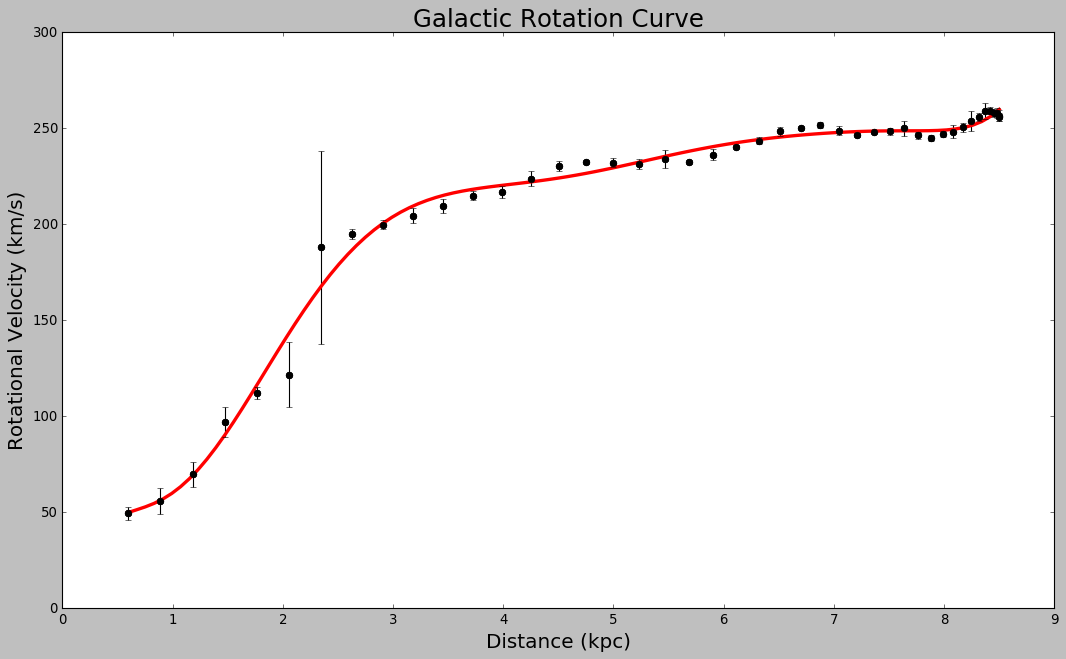

In [1057]:
# Rotation curve plot

plt.figure(figsize=(16,9))
plt.title('Galactic Rotation Curve', fontsize=22)
plt.xlabel('Distance (kpc)', fontsize=18)
plt.ylabel('Rotational Velocity (km/s)', fontsize=18)
plt.plot(dist,v_rot,'k.', markersize=12)
plt.plot(d,z(d),color='red', linewidth=3)
plt.errorbar(dist,v_rot, yerr=v_err,fmt='ko')
#plt.savefig('RotationCurve.png')

In [1010]:
# Enclosed mass calculations


# 1 kpc = 2.063e+8 A.U
# 1 km/s = 1.02201e-6 pc/yr
# P = 2π a/v
# M = a^3/P^2

def g_mass(dist,vel):
    p = []
    
    for i in range(len(dist)):
        
        # Determination of orbital period in correct units
        P = 2 * np.pi * (dist[i]*1e3/(vel[i]*1.02201e-6))
        p.append(P)
        
    m = []
    for i in range(len(dist)):
        
        M = (dist[i]*2.063e8)**3 / p[i]**2 # Keplers 3rd Law
        m.append(M)
        
    m = np.asarray(m)    
    print('Enclosed Mass: {:.2e}'.format(M), 'Solar Masses')    
    return m

In [1011]:
# Data for enclosed mass plot
x = np.asarray(dist)
y = g_mass(dist,v_rot)

Enclosed Mass: 1.29e+11 Solar Masses


In [810]:
# Linear fit fucntion
def linear(x,m,c):
    return m*x + c

popt, pcov = curve_fit(linear,x,y)

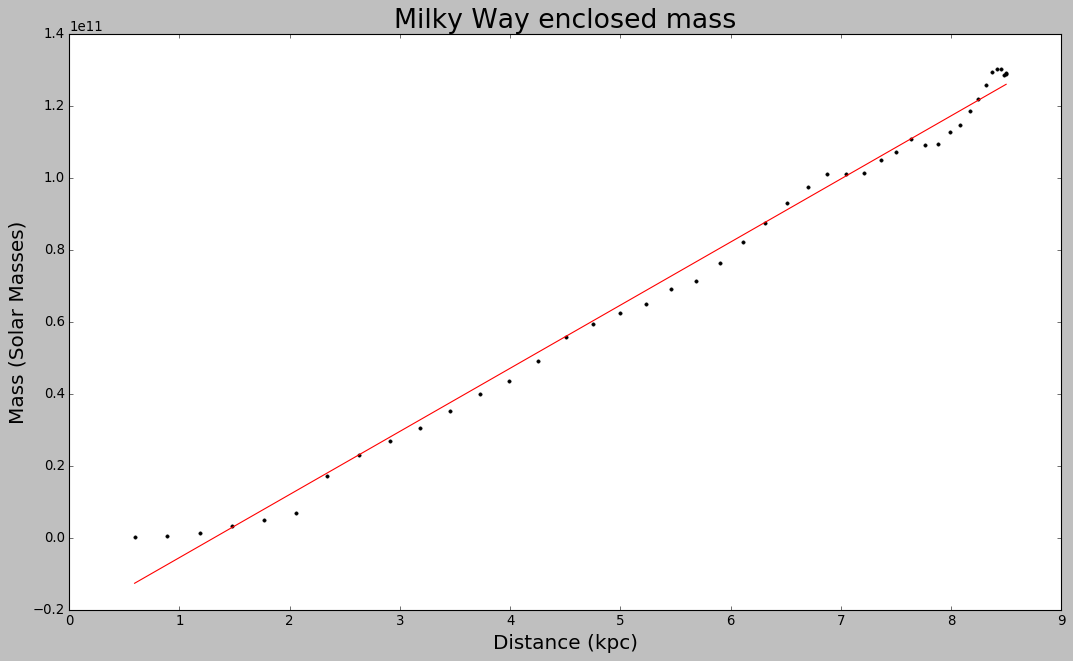

In [1052]:
# Enclosed mass plot
l = np.linspace(x[0],x[-1],100)

plt.figure(figsize=(16,9))
plt.title('Milky Way enclosed mass',fontsize=24)
plt.xlabel('Distance (kpc)',fontsize=18)
plt.ylabel('Mass (Solar Masses)', fontsize=18)
plt.plot(x,y,'k.')
plt.plot(l,linear(l,*popt),'r')
#plt.savefig('EncMass.png')